In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, gammainc, gammaincinv

Text(0, 0.5, 'p(x)')

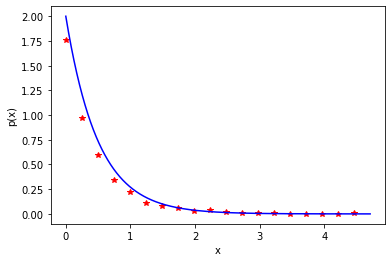

In [41]:
n_pnts = int(1e3)

u = np.random.rand(n_pnts)
lamb=2
x=-(1/lamb)*np.log(1-u)

xmax=max(x)
n_bins=20
dx=(xmax-0)/n_bins
values, bins = np.histogram(x, bins=np.linspace(0, xmax, n_bins))

values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, xmax, dx)

plt.figure(1)
plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lamb*np.exp(-lamb*x_values), '-b')
plt.xlabel("x")
plt.ylabel("p(x)")


Text(0, 0.5, 'p(xs)')

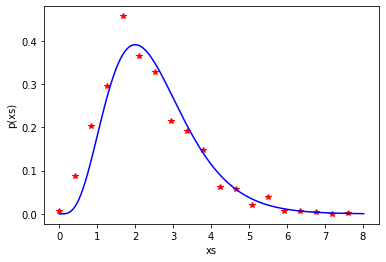

In [42]:
k=5
u=np.random.rand(n_pnts,k)

xk=-(1/lamb)*np.log(1-u)
xs=np.sum(xk,axis=1)


xmax=max(xs)
n_bins=20
dx=(xmax-0)/n_bins
values, bins = np.histogram(xs, bins=np.linspace(0, xmax, n_bins))


values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, xmax, dx)

plt.figure(2)
plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lamb**k*x_values**(k-1)*np.exp(-lamb*x_values)/gamma(k), '-b')
plt.xlabel("xs")
plt.ylabel("p(xs)")

fraçao rejeitada=  0.7316876844647169


Text(0, 0.5, 'p(xs)')

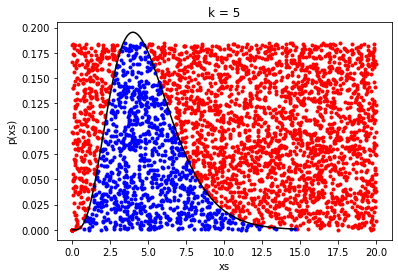

In [43]:
## b)
pklambda = lambda x,lamb,k : lamb**k*x**(k-1)*np.exp(-lamb*x)/gamma(k)

k=5
lamb=1
xmax=20
dx = 0.001
x_values = np.arange(0, xmax, dx)
a= max(pklambda(x,lamb,k))
n_pnts=int(1e3)

nn=0
nt=0
xfinal=np.zeros(n_pnts)
yfinal=np.zeros(n_pnts)
xp=np.zeros(n_pnts*5)
yp=np.zeros(n_pnts*5)

while nn<n_pnts:
    nt+=1
    xp[nt]=(np.random.rand(1)*xmax)[0]
    yp[nt]=(np.random.rand(1)*a)[0]
    if yp[nt]<=pklambda(xp[nt],lamb,k):
        xfinal[nn]=xp[nt]
        yfinal[nn]=yp[nt]
        nn+=1

print("fraçao rejeitada= ",(nt-nn)/nt)


xmax=max(xfinal)

dx = 0.001
x_values = np.arange(0, xmax, dx)

plt.figure(1)
plt.title("k = " + str(k))
plt.plot([x for x in xp if x not in xfinal ], [y for y in yp if y not in yfinal ], '.r')
plt.plot(xfinal, yfinal, '.b')
plt.plot(x_values, lamb**k*x_values**(k-1)*np.exp(-lamb*x_values)/gamma(k), '-k')
plt.xlabel("xs")
plt.ylabel("p(xs)")




Text(0, 0.5, 'p(xs)')

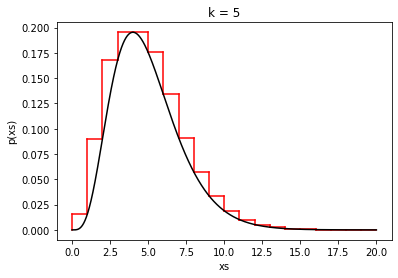

In [44]:
##c)
k=5
lamb=1

n_ret=20
xmax=20
dx=(xmax-0)/n_ret
xi= np.linspace(0, xmax-dx, n_ret)
xs=xi+dx
ys=np.zeros(n_ret)


plt.figure(1)
plt.title("k = " + str(k))
for i in range(n_ret):
    n1=1000
    x = np.linspace(xi[i], xs[i], n1)
    ys[i]=max(pklambda(x,lamb,k))
    plt.plot([xi[i],xi[i]],[pklambda(xi[i],lamb,k),ys[i]],"r-")
    plt.plot([xi[i],xs[i]],[ys[i],ys[i]],"r-")
    plt.plot([xs[i],xs[i]],[pklambda(xs[i],lamb,k),ys[i]],"r-")
    

dx=0.001
x_values = np.arange(0, xmax, dx)

plt.plot(x_values, lamb**k*x_values**(k-1)*np.exp(-lamb*x_values)/gamma(k), '-k')
plt.xlabel("xs")
plt.ylabel("p(xs)")





In [45]:
# mesmo que randsample(len(p),1,true,p) no matlab
def selecao(p):
    na=len(p)
    p=p/np.sum(p)
    u=np.random.rand(1)
    s=p[0]
    i=0
    while (u>s):
        i+=1
        s=s+p[i]
    return i

fraçao rejeitada=  0.15254237288135594


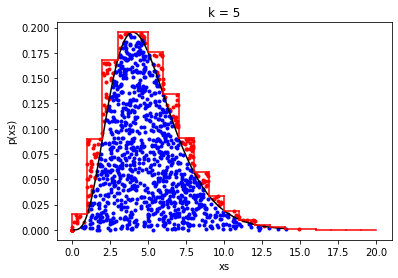

In [46]:
Ai=(xs-xi)*ys
p=Ai/np.sum(Ai)

nn=0
nt=0
xfinal=np.zeros(n_pnts)
yfinal=np.zeros(n_pnts)
xp=np.zeros(n_pnts*5)
yp=np.zeros(n_pnts*5)


while nn<n_pnts:
    i=selecao(p)
    nt+=1
    xp[nt]=(np.random.rand(1)*(xs[i]-xi[i])+xi[i])[0]
    yp[nt]=(np.random.rand(1)*ys[i])[0]
    if yp[nt]<=pklambda(xp[nt],lamb,k):
        xfinal[nn]=xp[nt]
        yfinal[nn]=yp[nt]
        nn+=1

print("fraçao rejeitada= ",(nt-nn)/nt)


xmax=max(xfinal)

dx = 0.001
x_values = np.arange(0, xmax, dx)

plt.figure(1)
plt.title("k = " + str(k))
plt.plot([x for x in xp if x not in xfinal ], [y for y in yp if y not in yfinal ], '.r')
plt.plot(xfinal, yfinal, '.b')
plt.plot(x_values, lamb**k*x_values**(k-1)*np.exp(-lamb*x_values)/gamma(k), '-k')
plt.xlabel("xs")
plt.ylabel("p(xs)")

for i in range(n_ret):
    n1=1000
    x = np.linspace(xi[i], xs[i], n1)
    ys[i]=max(pklambda(x,lamb,k))
    plt.plot([xi[i],xi[i]],[pklambda(xi[i],lamb,k),ys[i]],"r-")
    plt.plot([xi[i],xs[i]],[ys[i],ys[i]],"r-")
    plt.plot([xs[i],xs[i]],[pklambda(xs[i],lamb,k),ys[i]],"r-")
    



Text(0, 0.5, 'p(xs)')

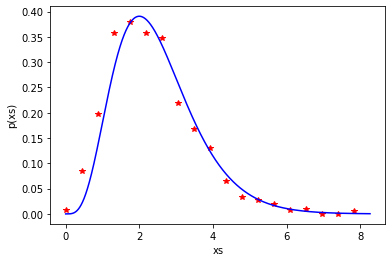

In [51]:
# d) 
n_pnts=int(1e3)
k=5
lamb=2
u=np.random.rand(n_pnts)
x=1/lamb*gammaincinv(k,u)

xmax=max(x)
n_bins=20
dx=(xmax-0)/n_bins
values, bins = np.histogram(x, bins=np.linspace(0, xmax, n_bins))


values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, xmax, dx)

plt.figure(2)
plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lamb**k*x_values**(k-1)*np.exp(-lamb*x_values)/gamma(k), '-b')
plt.xlabel("xs")
plt.ylabel("p(xs)")
